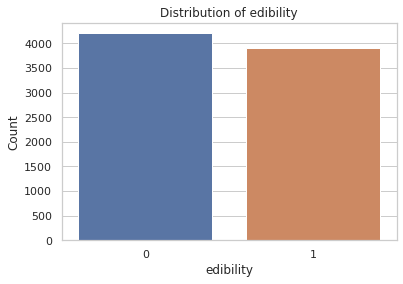

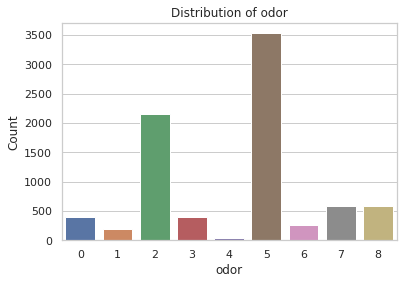

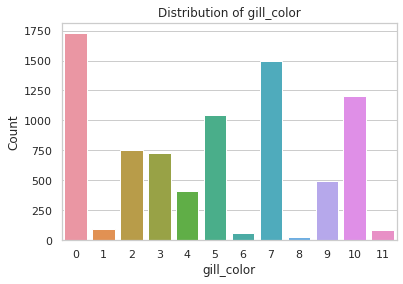

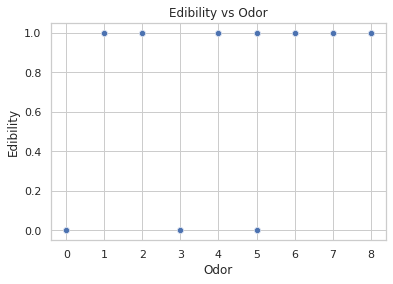

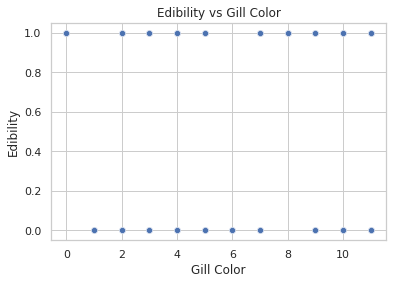

In [6]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
column_names = [
    "class", "cap_shape", "cap_surface", "cap_color", "bruises", "odor",
    "gill_attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape",
    "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
    "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color",
    "ring_number", "ring_type", "spore_print_color", "population", "habitat"
]
df = pd.read_csv(url, header=None, names=column_names)

#Selecting Relevant Columns
df_subset = df[["class", "odor", "gill_color"]].copy()
df_subset.columns = ["edibility", "odor", "gill_color"]

#Encoding Categorical Values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_subset.columns:
    df_subset[col] = le.fit_transform(df_subset[col])

#Exploring Data Distributions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
for col in df_subset.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df_subset)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#Scatterplots for the Featured Relationships
plt.figure(figsize=(6, 4))
sns.scatterplot(x="odor", y="edibility", data=df_subset)
plt.title("Edibility vs Odor")
plt.xlabel("Odor")
plt.ylabel("Edibility")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x="gill_color", y="edibility", data=df_subset)
plt.title("Edibility vs Gill Color")
plt.xlabel("Gill Color")
plt.ylabel("Edibility")
plt.show()

I processed the Mushroom dataset from the UCI Machine Learning Repository to prepare it for graph modeling with scikit-learn. I selected three key features: edibility (target), odor, and gill color, and used  to convert their values into numbers. To explore the data, I created graphs on the distribution of each feature. The "Distribution of edibility" graph shows that mushrooms labeled as poisonous (numbered as 1) slightly outnumber those labeled as edible (encoded as 0), with counts just above and below 4000 respectively. This balance is useful for training fair classification models. The "Distribution of odor" graph reveals that odor category 5 (musty') dominates the dataset with over 3500 samples, while odor category 2 ('creosote') has over 2000. These high counts shows that certain odors are much more common. 

The "Distribution of gill color" graph shows that gill color 0 ('buff') is the most frequent, followed by categories 7 and 10, while categories like 6 and 8 are rare. Finally, the "Edibility vs Gill Color" scatterplot shows that nearly every gill color value appears in both edible and poisonous mushrooms, possibly showing that gill color alone may not be a strong predictor for it. These outcomes support the conclusion that odor is a more reliable feature for predicting mushroom edibility in the future.